In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import linprog
import scipy.optimize as opt
import scipy
from scipy.stats import norm as scipy_norm
%matplotlib inline
import cvxpy as cp
from cvxpy.atoms.norm import norm
from cvxpy.atoms.affine.sum import sum

In [27]:
x = np.array([0, 4, 8, 12, 16, 20, 24])
y = np.array([4, 5, 4, 6, 5, 7, 4])
c = np.array([3, 2, 2, 1, 2])
y_p = cp.Variable(5)
objective = cp.Minimize((y_p[1] - y_p[0])**2 +
                        (y_p[2] - y_p[1])**2 + 
                        (y_p[3] - y_p[2])**2 + 
                        (y_p[4] - y_p[3])**2 +
                        (y_p[0] - y[0])**2 +
                        (y_p[4] - y[6])**2)

constraints = [y_p >= y[1:-1] - c/2,
               y_p <= y[1:-1] + c/2]
prob = cp.Problem(objective, constraints)
print(objective.is_dcp())
#print(prob.get_problem_data('ECOS'))

result = prob.solve(verbose=False)
print(result)
print(y_p.value)

True
4.812499991956032
[4.37499449 4.74999612 5.12498808 5.5        6.        ]


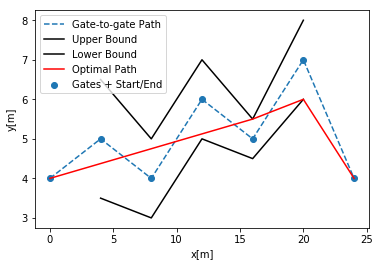

In [57]:
flatten = lambda l: [item for sublist in l for item in sublist]
plt.scatter(x, y)
plt.plot(x, y, ls='dashed')
plt.plot(x[1:-1], y[1:-1] + c/2, color='black')
plt.plot(x[1:-1], y[1:-1] - c/2, color='black')
plt.plot(x, flatten([[y[0]], y_p.value, [y[-1]]]), color='red')
plt.legend(['Gate-to-gate Path', 'Upper Bound', 'Lower Bound', 'Optimal Path', 'Gates + Start/End'])
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.savefig('problem5_sol.png', dpi=300)